In [1]:
# Exercise 1 - Load in the data
# Load in the sea-levels data and have a look, dont forget to check the numerical and technical summaries and get a feel for the dataset

import pandas as pd

# URL of the raw data
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'

# Load the data into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print("First few rows of the data:")
print(df.head())

# Display a summary of the DataFrame
print("\nSummary of the data:")
print(df.info())

# Display numerical statistics
print("\nNumerical summary of the data:")
print(df.describe())


First few rows of the data:
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  

Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 

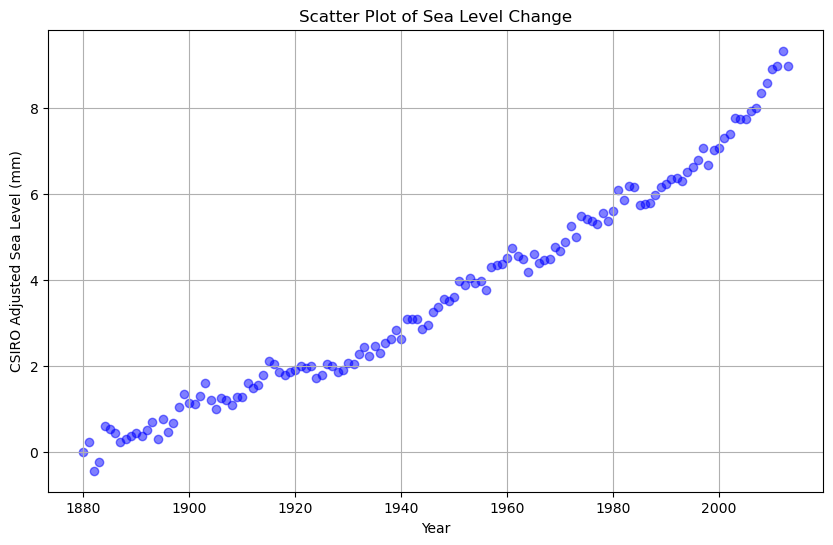

In [3]:
# Exercise 2 - scatter plot
# Create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axis.

import pandas as pd
import matplotlib.pyplot as plt

# URL of the raw data
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'

# Load the data into a DataFrame
df = pd.read_csv(url)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (mm)')
plt.title('Scatter Plot of Sea Level Change')

# Display the plot
plt.grid(True)
plt.show()


Number of null values in 'NOAA Adjusted Sea Level':
113

Number of null values in 'NOAA Adjusted Sea Level' after cleaning:
0

First few rows of the cleaned data:
     Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
113  1993                  6.291339           6.027559           6.555118   
114  1994                  6.500000           6.236220           6.763780   
115  1995                  6.618110           6.354331           6.881890   
116  1996                  6.787402           6.523622           7.051181   
117  1997                  7.066929           6.803150           7.330709   

     NOAA Adjusted Sea Level  
113                 6.297493  
114                 6.310934  
115                 6.452569  
116                 6.627631  
117                 6.733920  


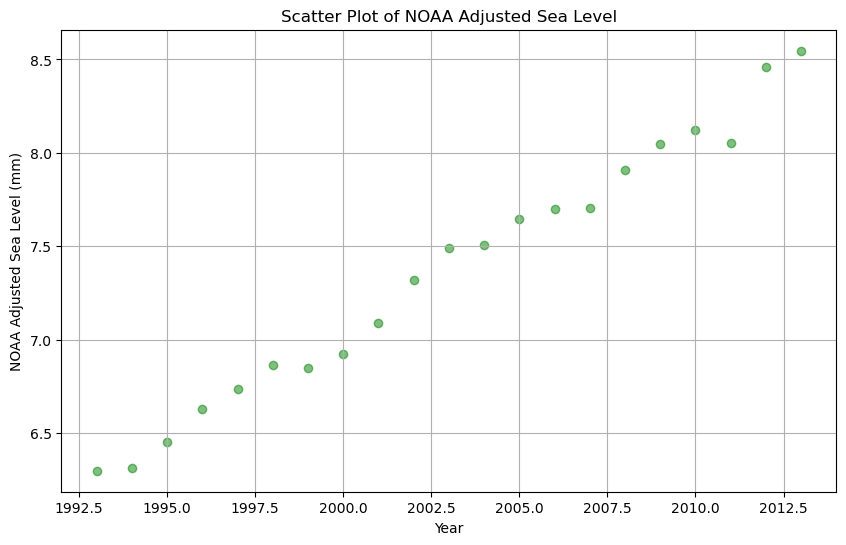

In [7]:
# Exercise 3 - Clean the data
# The column NOAA has null values in a number of rows. Clean the data, producing a new dataframe.
# plot scatter graph for NOAA adjusted levels

import pandas as pd
import matplotlib.pyplot as plt

# URL of the raw data
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'

# Load the data into a DataFrame
df = pd.read_csv(url)

# Display the number of null values in the 'NOAA Adjusted Sea Level' column
print("Number of null values in 'NOAA Adjusted Sea Level':")
print(df['NOAA Adjusted Sea Level'].isnull().sum())

# Remove rows with null values in the 'NOAA Adjusted Sea Level' column
df_cleaned = df.dropna(subset=['NOAA Adjusted Sea Level'])

# Verify that the null values have been removed
print("\nNumber of null values in 'NOAA Adjusted Sea Level' after cleaning:")
print(df_cleaned['NOAA Adjusted Sea Level'].isnull().sum())

# Display the first few rows of the cleaned DataFrame
print("\nFirst few rows of the cleaned data:")
print(df_cleaned.head())

# Create a scatter plot for NOAA Adjusted Sea Level
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Year'], df_cleaned['NOAA Adjusted Sea Level'], color='green', alpha=0.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('NOAA Adjusted Sea Level (mm)')
plt.title('Scatter Plot of NOAA Adjusted Sea Level')

# Display the plot
plt.grid(True)
plt.show()


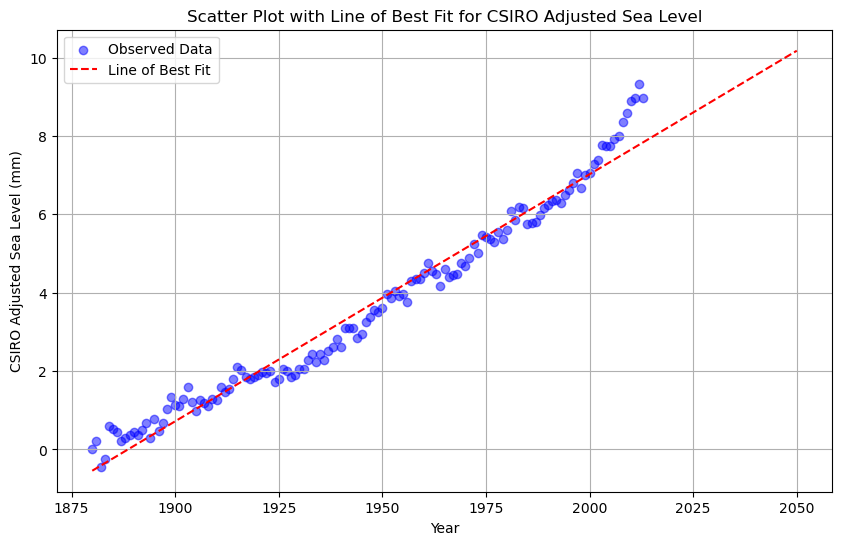

In [9]:
# Exercise 4 - plot line of best fit for CSIRO
#     Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit.
#     Plot the line of best fit over the top of the scatter plot.
#     Make the line go through the year 2050 to predict the sea level rise in 2050.

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# URL of the raw data
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'

# Load the data into a DataFrame
df = pd.read_csv(url)

# Remove rows with null values in the 'CSIRO Adjusted Sea Level' column
df_cleaned = df.dropna(subset=['CSIRO Adjusted Sea Level'])

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['Year'], df_cleaned['CSIRO Adjusted Sea Level'])

# Create a range of years from the first year to 2050
years_extended = np.arange(df_cleaned['Year'].min(), 2051, 1)

# Calculate the predicted sea levels using the line of best fit
sea_levels_predicted = slope * years_extended + intercept

# Create a scatter plot for CSIRO Adjusted Sea Level
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Year'], df_cleaned['CSIRO Adjusted Sea Level'], color='blue', alpha=0.5, label='Observed Data')

# Plot the line of best fit
plt.plot(years_extended, sea_levels_predicted, color='red', linestyle='--', label='Line of Best Fit')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (mm)')
plt.title('Scatter Plot with Line of Best Fit for CSIRO Adjusted Sea Level')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


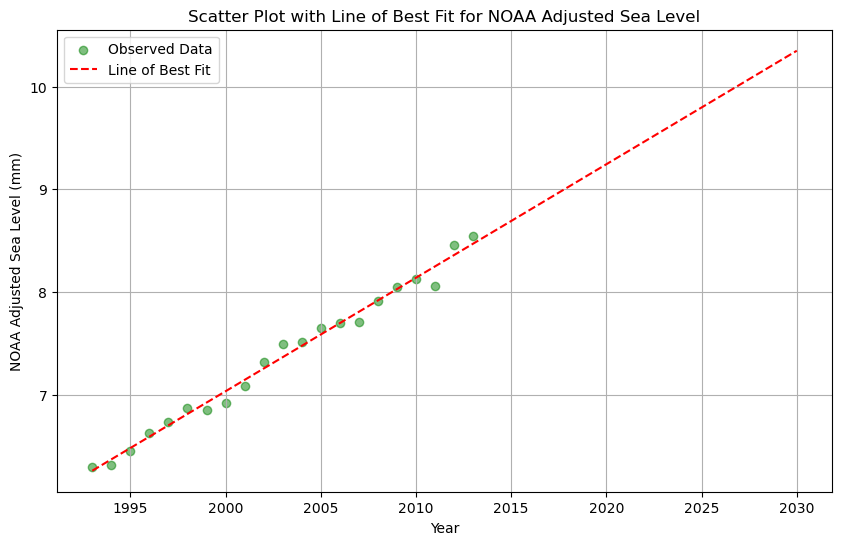

In [11]:
# Exercise 5 - plot line of best fit for NOAA
#     Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit.
#     Plot the line of best fit over the top of the scatter plot.
#     Make the line go through the year 2030 to predict the sea level rise in 2030

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# URL of the raw data
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'

# Load the data into a DataFrame
df = pd.read_csv(url)

# Remove rows with null values in the 'NOAA Adjusted Sea Level' column
df_cleaned_noaa = df.dropna(subset=['NOAA Adjusted Sea Level'])

# Calculate the line of best fit for NOAA Adjusted Sea Level
slope_noaa, intercept_noaa, r_value_noaa, p_value_noaa, std_err_noaa = linregress(df_cleaned_noaa['Year'], df_cleaned_noaa['NOAA Adjusted Sea Level'])

# Create a range of years from the first year to 2030
years_extended_noaa = np.arange(df_cleaned_noaa['Year'].min(), 2031, 1)

# Calculate the predicted sea levels using the line of best fit for NOAA
sea_levels_predicted_noaa = slope_noaa * years_extended_noaa + intercept_noaa

# Create a scatter plot for NOAA Adjusted Sea Level
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned_noaa['Year'], df_cleaned_noaa['NOAA Adjusted Sea Level'], color='green', alpha=0.5, label='Observed Data')

# Plot the line of best fit
plt.plot(years_extended_noaa, sea_levels_predicted_noaa, color='red', linestyle='--', label='Line of Best Fit')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('NOAA Adjusted Sea Level (mm)')
plt.title('Scatter Plot with Line of Best Fit for NOAA Adjusted Sea Level')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


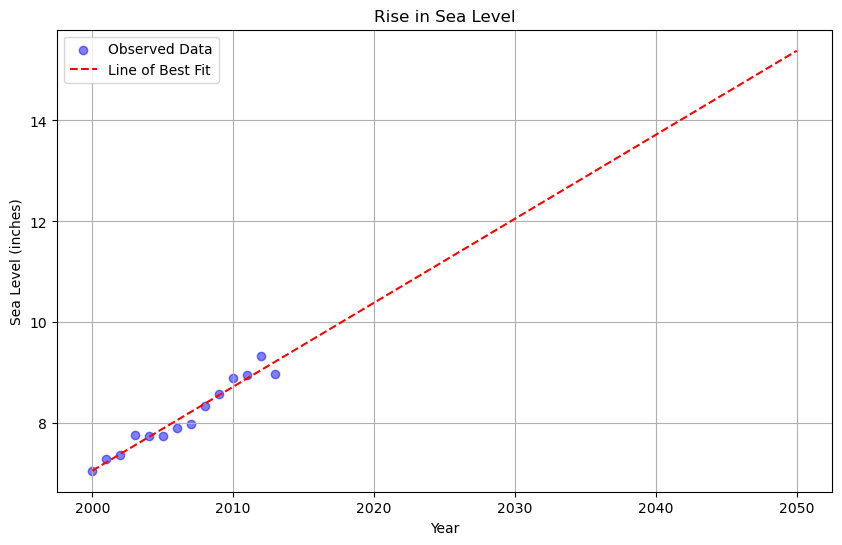

In [15]:
# Exercise 6 - shorter range (starting 2000)
# Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset and using the CSIRO adjusted levels. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# URL of the raw data
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'

# Load the data into a DataFrame
df = pd.read_csv(url)

# Remove rows with null values in the 'CSIRO Adjusted Sea Level' column
df_cleaned_csiro = df.dropna(subset=['CSIRO Adjusted Sea Level'])

# Filter the data to include only years from 2000 to the most recent year
df_recent = df_cleaned_csiro[df_cleaned_csiro['Year'] >= 2000]

# Calculate the line of best fit for the filtered data
slope_csiro, intercept_csiro, r_value_csiro, p_value_csiro, std_err_csiro = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])

# Create a range of years from 2000 to 2050
years_extended_csiro = np.arange(2000, 2051, 1)

# Calculate the predicted sea levels using the line of best fit for CSIRO
sea_levels_predicted_csiro = slope_csiro * years_extended_csiro + intercept_csiro

# Create a scatter plot for CSIRO Adjusted Sea Level from the year 2000 onwards
plt.figure(figsize=(10, 6))
plt.scatter(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'], color='blue', alpha=0.5, label='Observed Data')

# Plot the line of best fit
plt.plot(years_extended_csiro, sea_levels_predicted_csiro, color='red', linestyle='--', label='Line of Best Fit')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

